In [1]:
import gym
import utils
from get_hyperparams import get_hyperparams
from rateRNN import nonNN as Model
import numpy as np
from matplotlib import pyplot as plt
import utils
import pickle
import cv2

Compare rewards whether obs[0] used to control the direction

In [2]:
log_dir = r"./results/Swimmer-v4_20221012_200220_nonNN_mask_0_3_4_5_6_7/"
data = utils.load_pickle(log_dir + "Swimmer-v4_checkpoint_iter121.pickle")
temp = data['weights']
temp[-5:] = 0
temp[-5-8:-7] = 0
temp[-16] = 0

env = gym.make('Swimmer-v4')
reward_total_rec1 = []
reward_total_rec0 = []
dir_rec1 = []
dir_rec0 = []
N = 100

for _ in range(N):
    obs = env.reset()
    reward_total = 0
    y = []
    for _ in range(1000):
        action = [0, 0]
        if obs[1]*temp[-15] + obs[2]*temp[-14] > 0:
            action[0] = 1
        else:
            action[0] = -1

        if obs[1]*temp[-7] + obs[2]*temp[-6] > 0:
            action[1] = 1
        else:
            action[1] = -1

        obs, reward, _, info = env.step(action)
        reward_total += reward
        y.append(info['y_position'])

    reward_total_rec0.append(reward_total)
    dir_rec0.append(np.mean(y))

for _ in range(N):
    obs = env.reset()
    reward_total = 0
    for _ in range(1000):
        action = [0, 0]
        if obs[1]*temp[-15] + obs[2]*temp[-14] > obs[0]:
            action[0] = 1
        else:
            action[0] = -1

        if obs[1]*temp[-7] + obs[2]*temp[-6] > 0:
            action[1] = 1
        else:
            action[1] = -1

        obs, reward, _, info = env.step(action)
        reward_total += reward
        y.append(info['y_position'])

    reward_total_rec1.append(reward_total)
    dir_rec1.append(np.mean(y))

c:\Users\jiumao\anaconda3\envs\torch\lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\jiumao\anaconda3\envs\torch\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


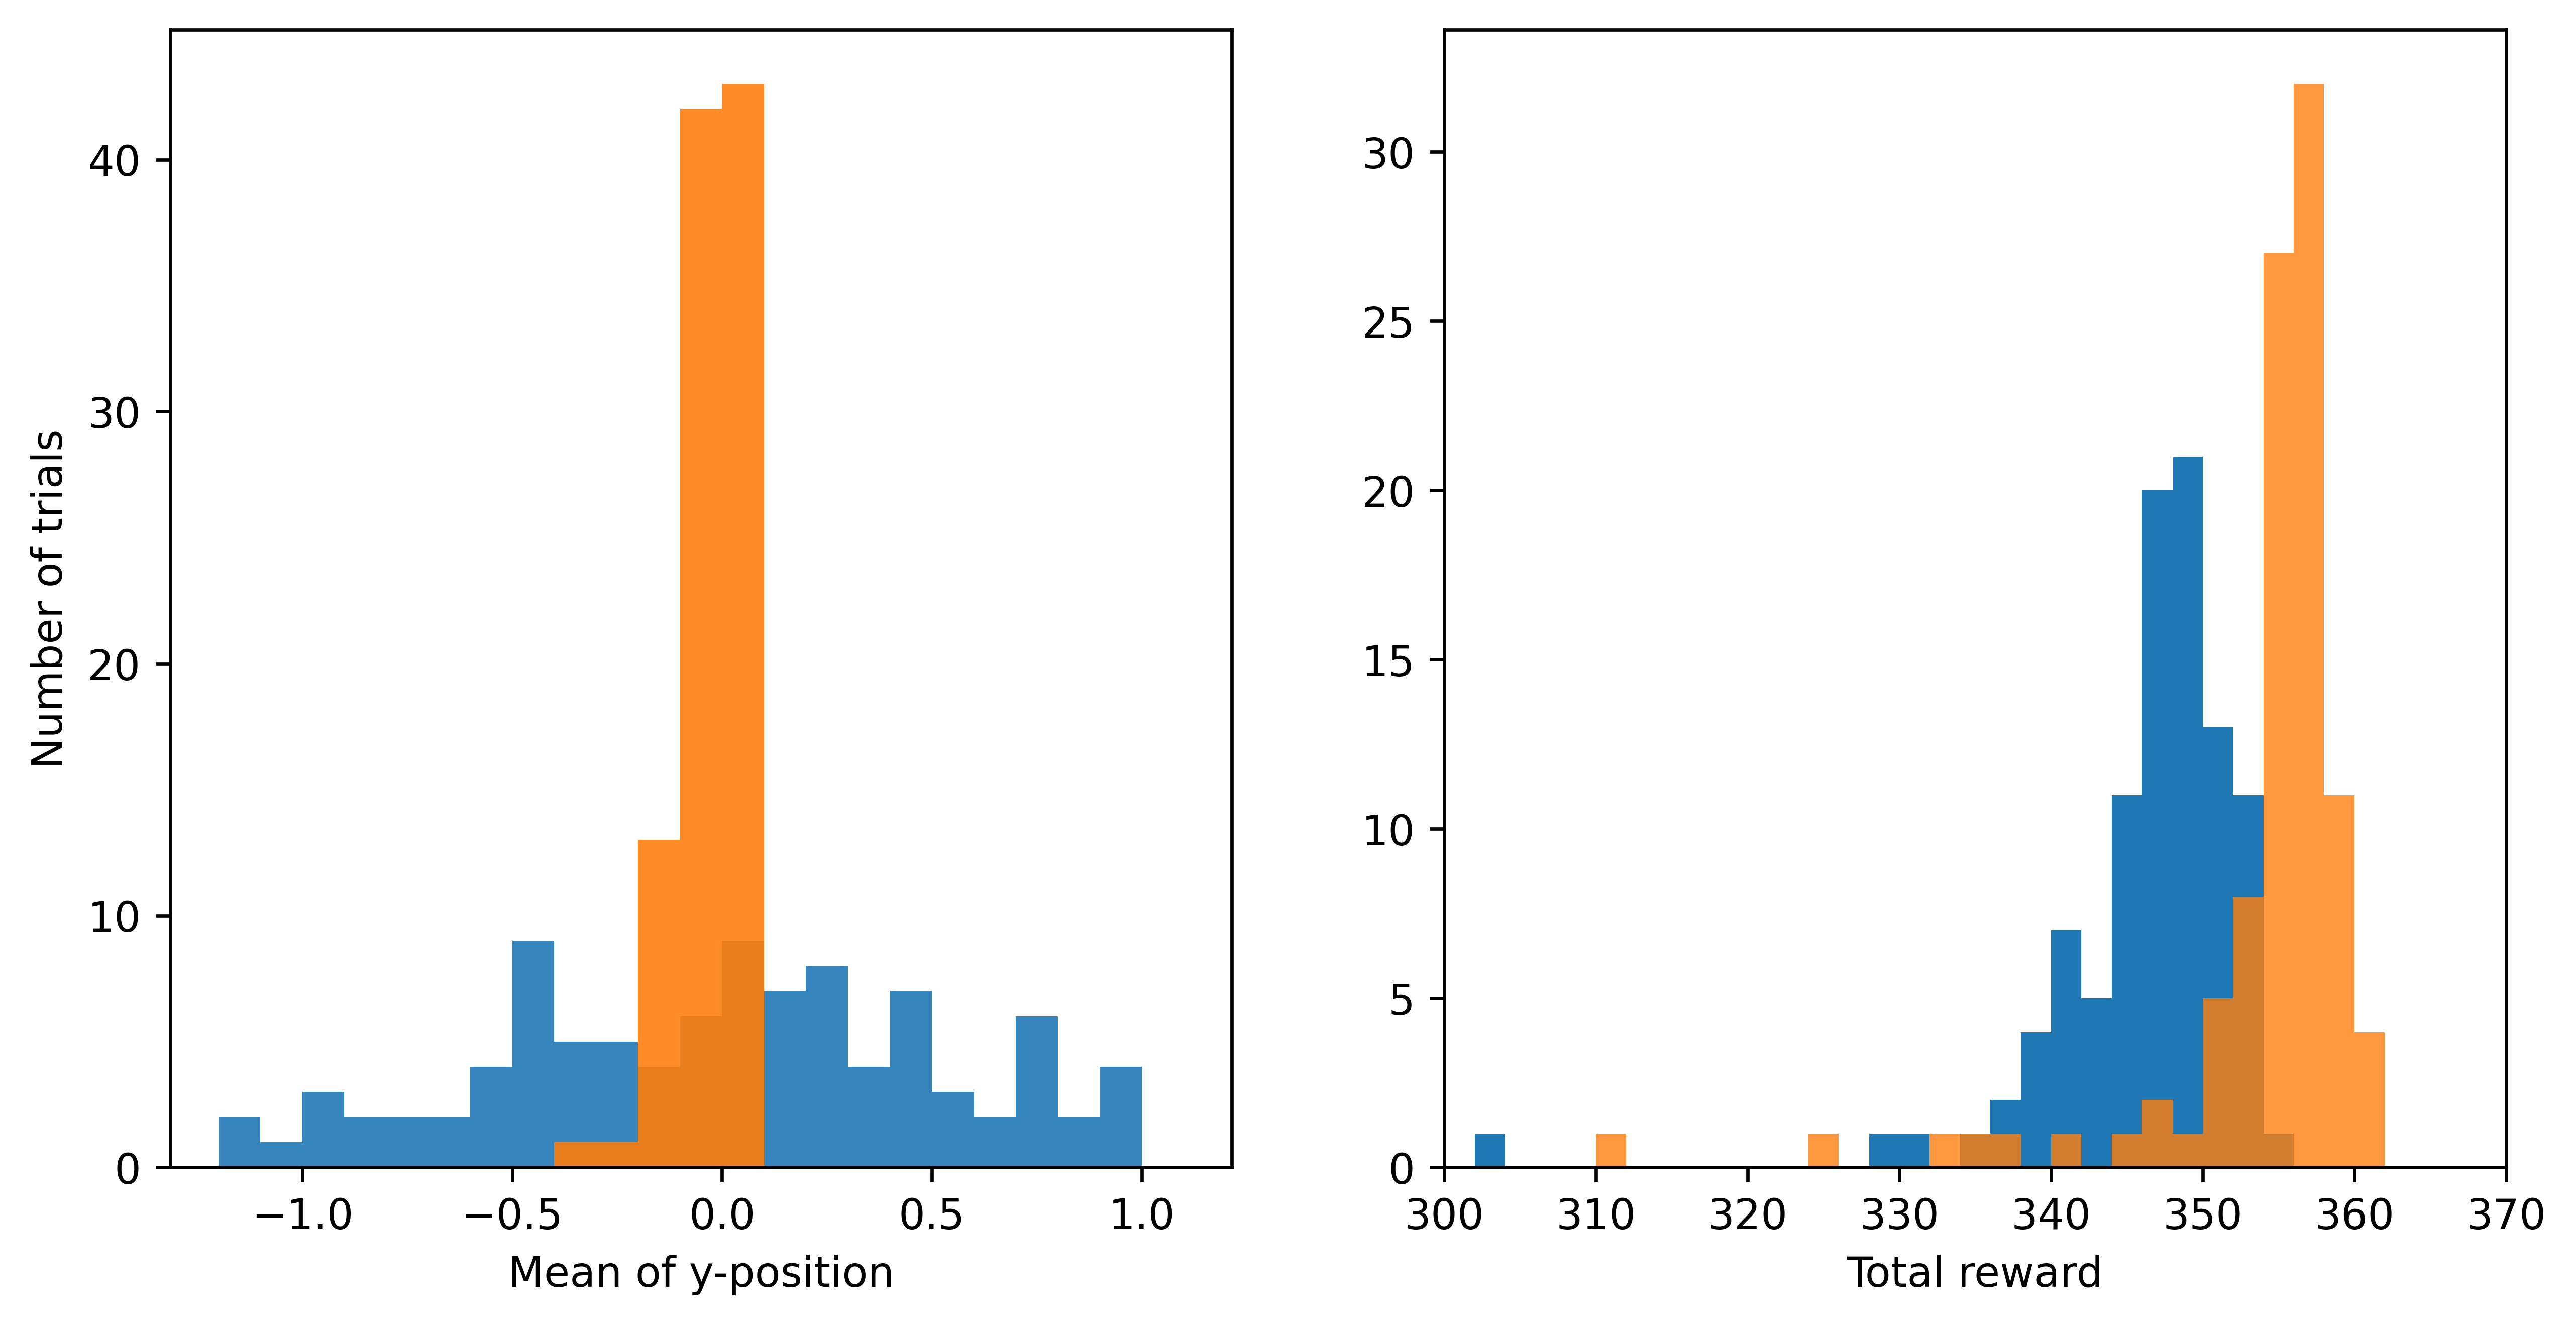

In [3]:
plt.figure(figsize=[10,5], dpi=600)
plt.subplot(1,2,1)
bins = [k/10 for k in range(-12,12,1)]
plt.hist(dir_rec0, bins=bins, alpha=0.9)
plt.hist(dir_rec1, bins=bins, alpha=0.9)
plt.xlabel('Mean of y-position')
plt.ylabel('Number of trials')
plt.subplot(1,2,2)
# error_params=dict(elinewidth=4,ecolor='black',capsize=5)
# plt.bar(1,np.mean(reward_total_rec0),yerr=np.std(reward_total_rec0),error_kw=error_params)
# plt.bar(2,np.mean(reward_total_rec1),yerr=np.std(reward_total_rec1),error_kw=error_params)
bins = [k for k in range(300,370,2)]
plt.hist(reward_total_rec0, bins=bins)
plt.hist(reward_total_rec1, bins=bins, alpha=0.8)
# plt.ylim([320,380])
plt.xlim([300,370])
plt.xlabel('Total reward')
# plt.xticks([1,2])

plt.show()

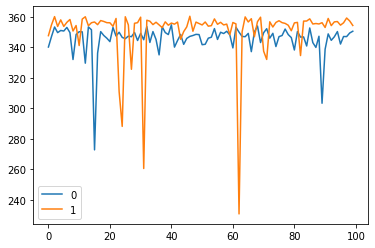

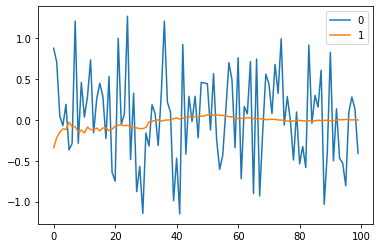

In [4]:
plt.figure()
plt.plot(reward_total_rec0)
plt.plot(reward_total_rec1)
plt.legend(['0','1'])
plt.show()
plt.figure()
plt.plot(dir_rec0)
plt.plot(dir_rec1)
plt.legend(['0','1'])
plt.show()

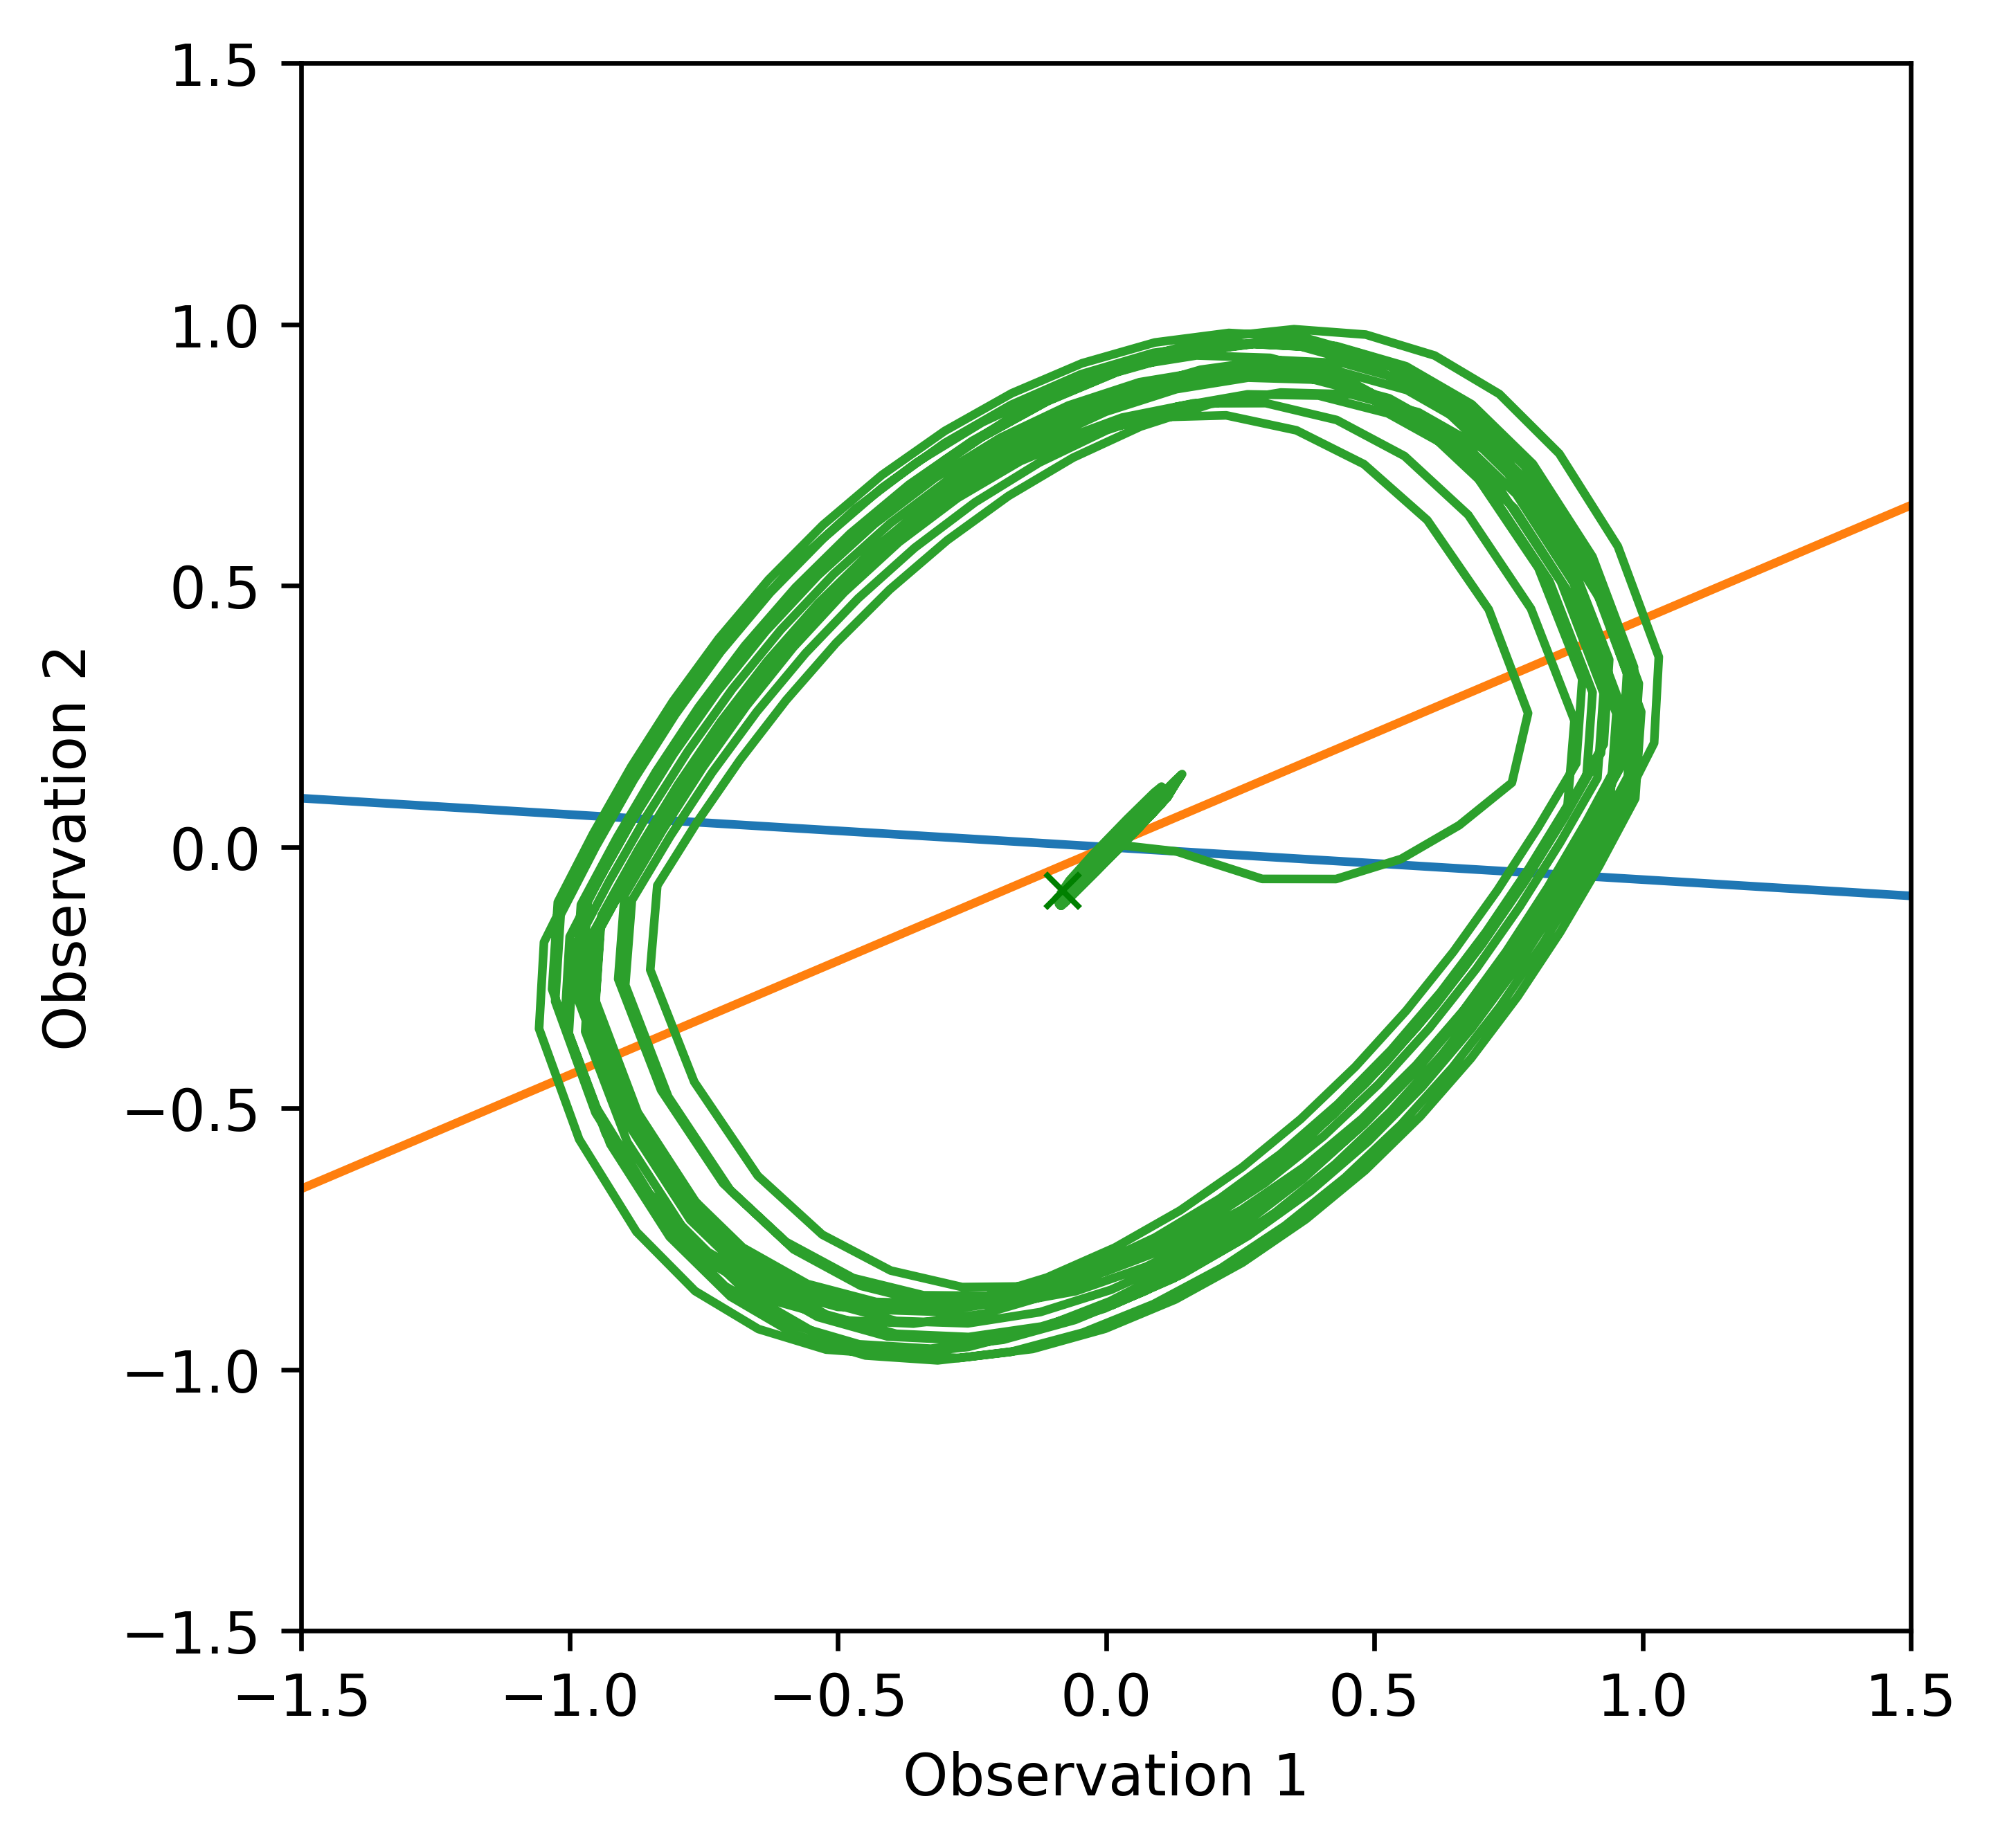

In [5]:
obs_rec = []
obs = env.reset()
obs_rec.append(obs)
for _ in range(1000):
    action = [0, 0]
    if obs[1]*temp[-15] + obs[2]*temp[-14] > obs[0]:
        action[0] = 1
    else:
        action[0] = -1

    if obs[1]*temp[-7] + obs[2]*temp[-6] > 0:
        action[1] = 1
    else:
        action[1] = -1

    obs, reward, _, _ = env.step(action)
    obs_rec.append(obs)

fig = plt.figure(figsize=[5, 5], dpi=600)
plt.plot([-2, 2], [2*temp[-15]/temp[-14], -2*temp[-15]/temp[-14]])
plt.plot([-2, 2], [2*temp[-7]/temp[-6], -2*temp[-7]/temp[-6]])
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

plt.plot(np.array(obs_rec)[:, 1], np.array(obs_rec)[:, 2])
plt.plot(np.array(obs_rec)[0, 1], np.array(obs_rec)[0, 2],'gx')
plt.xlabel('Observation 1')
plt.ylabel('Observation 2')
plt.show()

# plt.savefig('fig1.jpg')

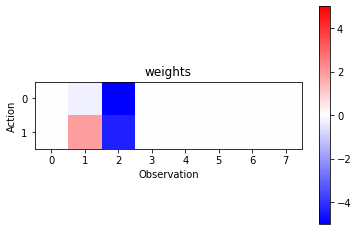

In [6]:
mdl = Model(checkpoint=data, mask=[0,3,4,5,6,7])
mdl.visualize_weight()

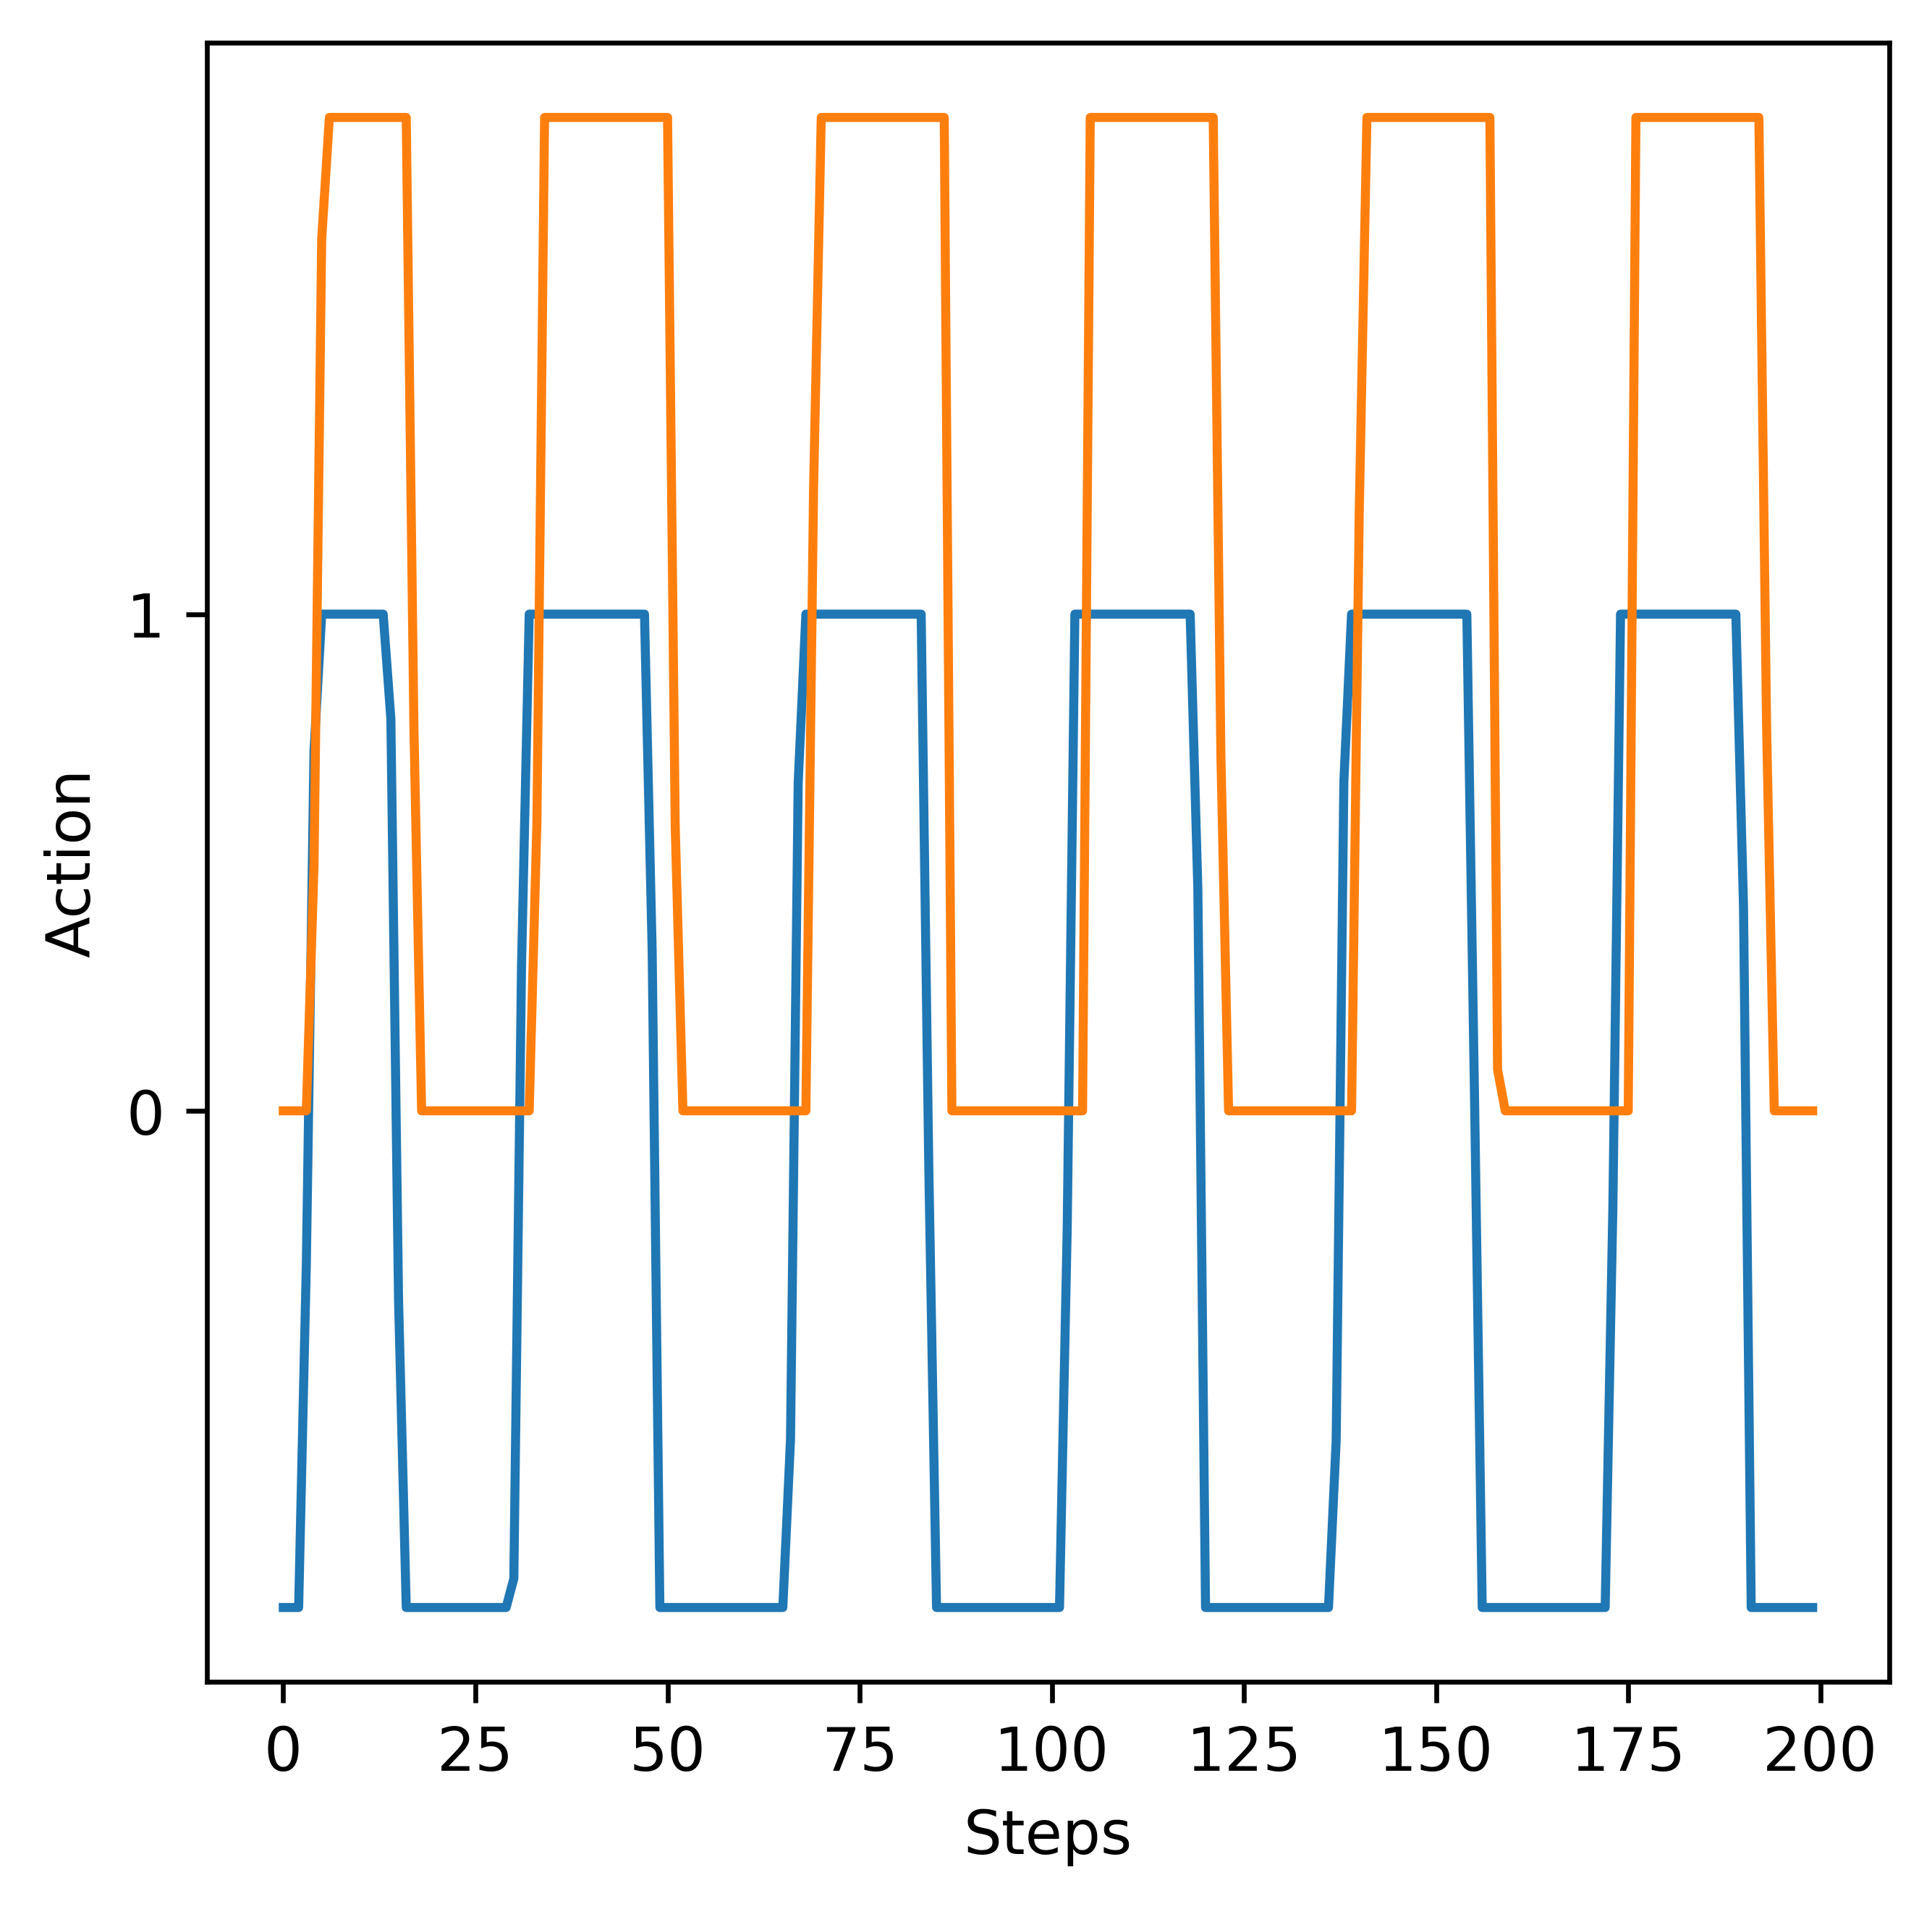

In [7]:
mdl.show_output(duration=200)

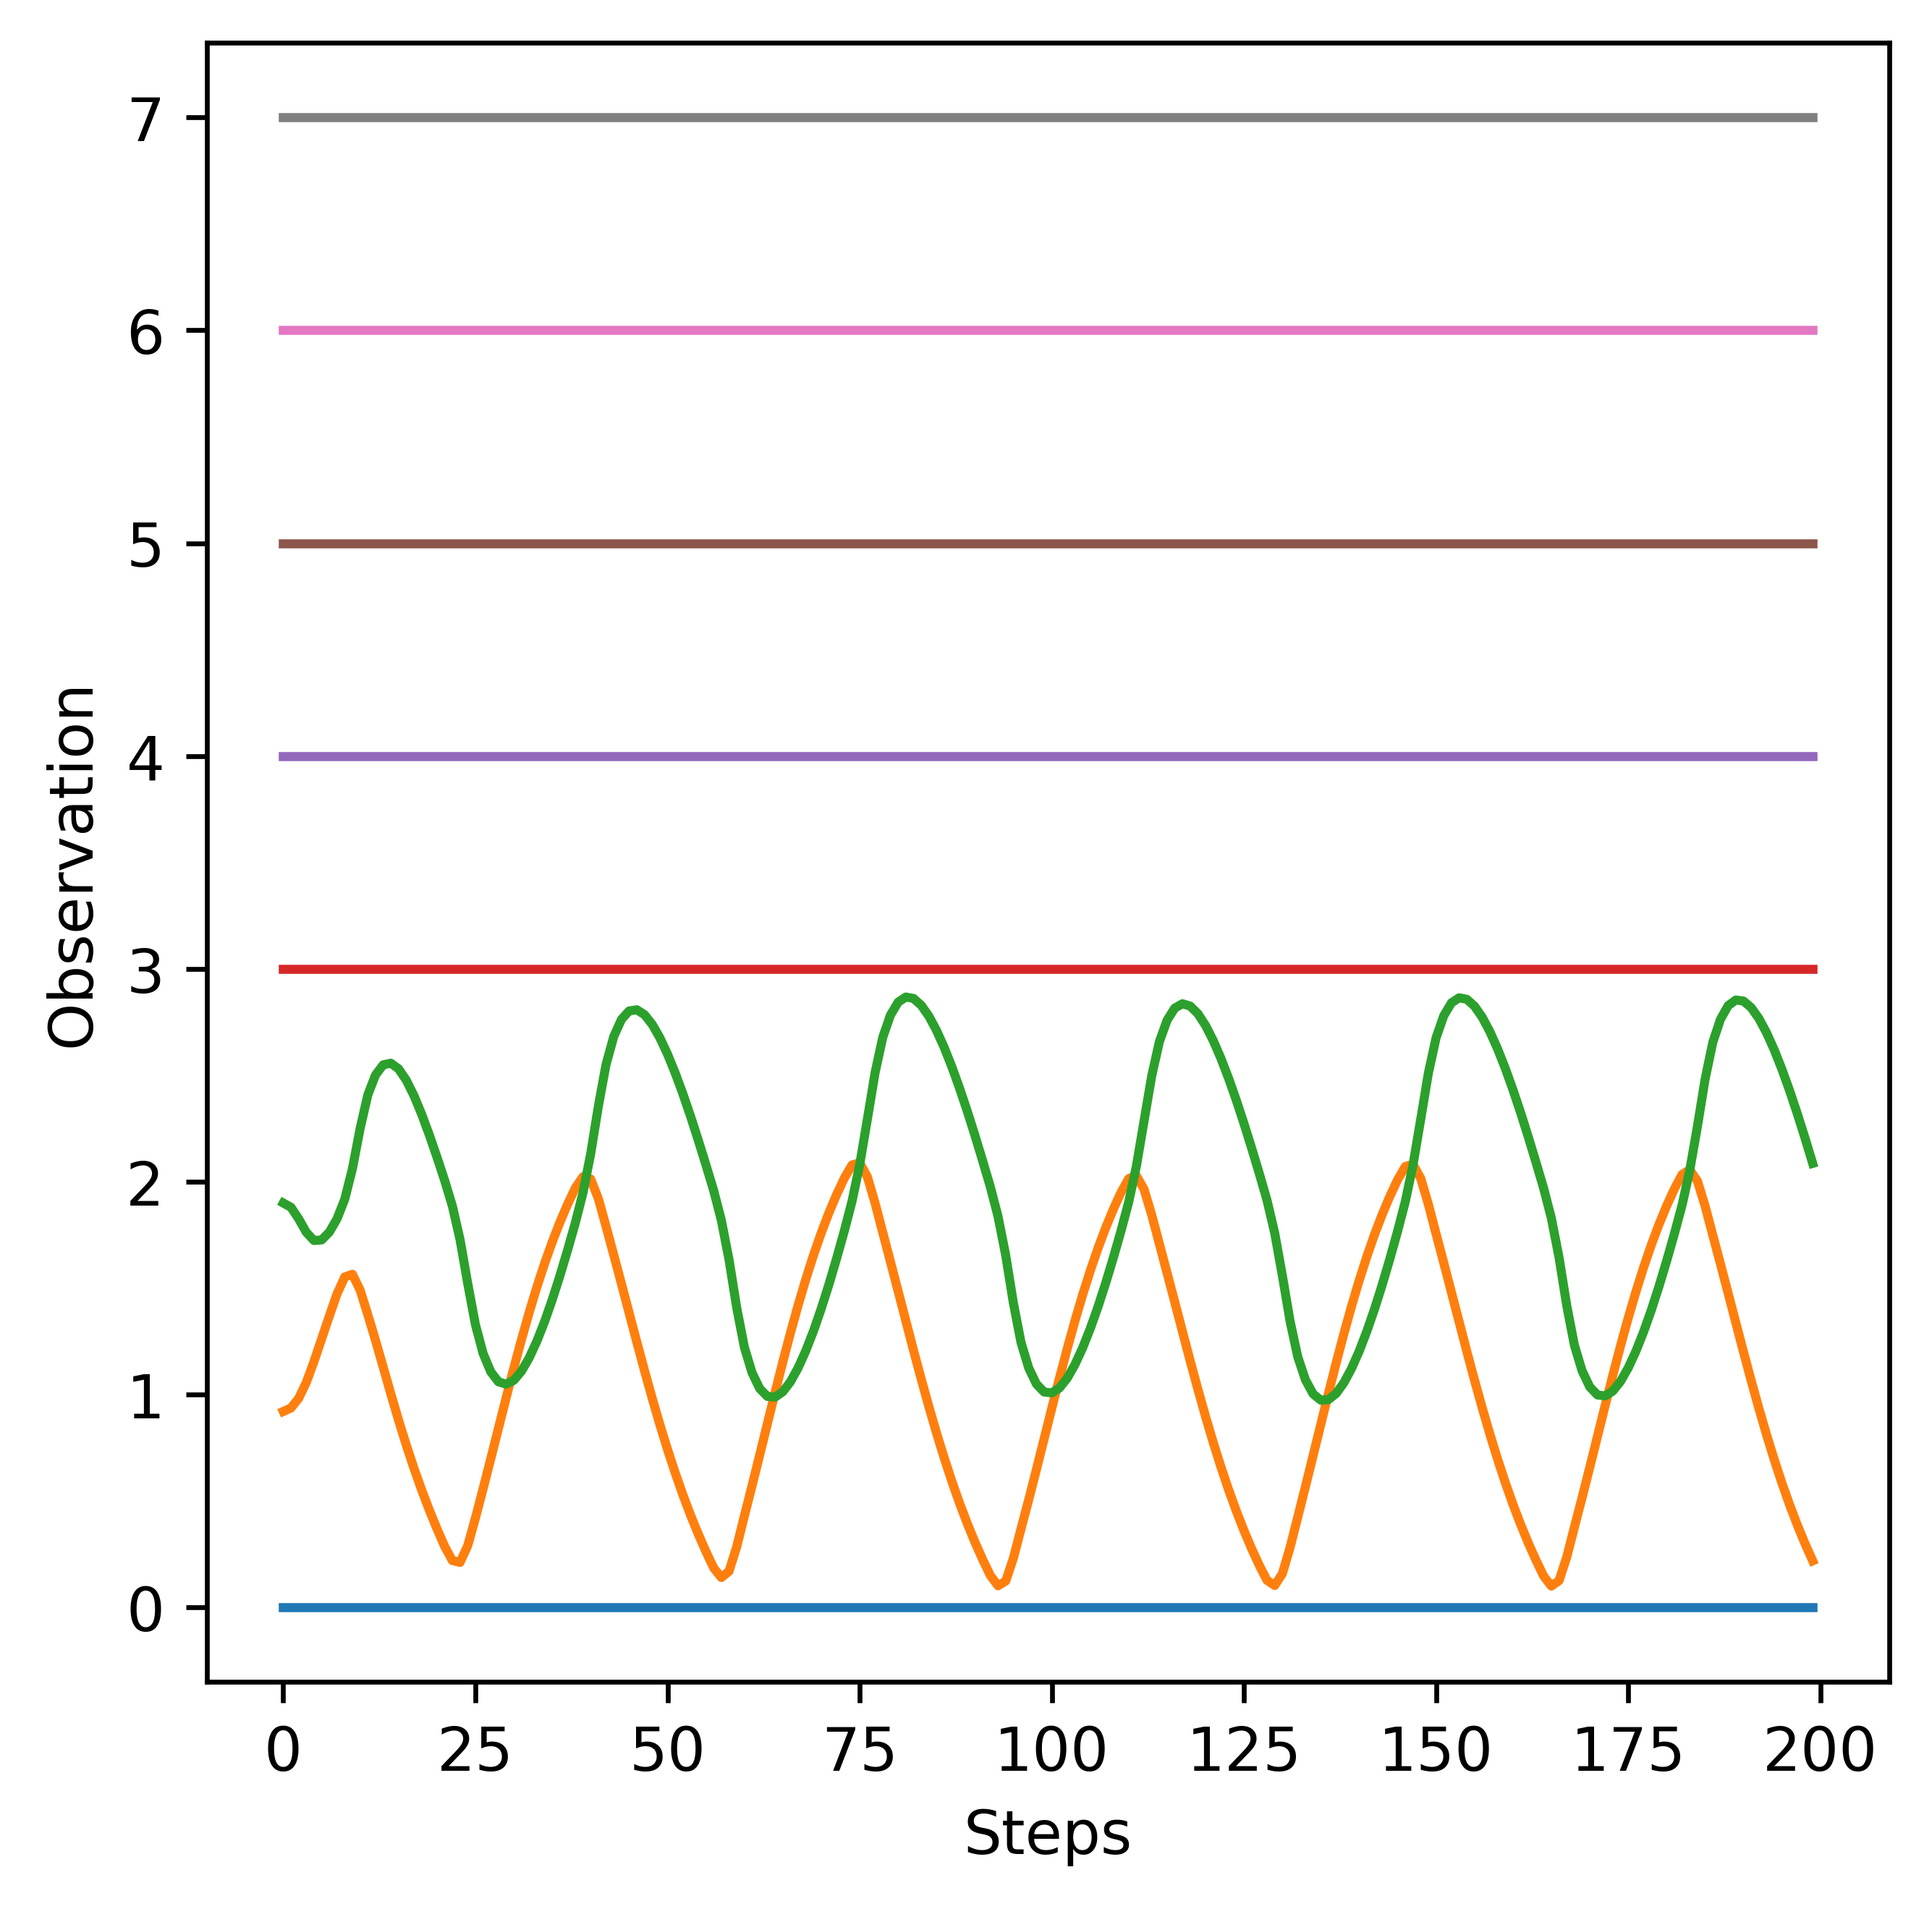

In [8]:
mdl.show_input(duration=200)

In [9]:
log_dir = r"./results/Swimmer-v4_20221012_214002_nonNN_mask_3_4_5_6_7/"
data = utils.load_pickle(log_dir + "Swimmer-v4_checkpoint_iter161.pickle")
temp = data['weights']
temp[-5:] = 0
temp[-5-8:-8] = 0
data['weights'] = temp

rnn = Model(checkpoint=data, mask=[3,4,5,6,7])

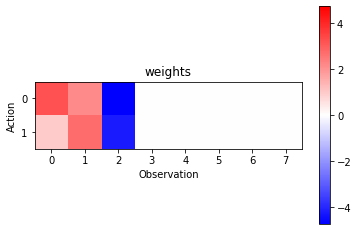

In [10]:
rnn.visualize_weight()

In [11]:
log_dir = r"./results/Swimmer-v4_20221012_200220_nonNN_mask_0_3_4_5_6_7/"
data = utils.load_pickle(log_dir + "Swimmer-v4_checkpoint_iter121.pickle")
temp = data['weights']
temp[-5:] = 0
temp[-5-8:-7] = 0
temp[-16] = 0

env = gym.make('Swimmer-v4')
reward_total_rec2 = []
reward_total_rec1 = []
reward_total_rec0 = []
dir_rec2 = []
dir_rec1 = []
dir_rec0 = []
N = 100

for _ in range(N):
    obs = env.reset()
    reward_total = 0
    y = []
    for _ in range(1000):
        action = [0, 0]
        if obs[1]*temp[-15] + obs[2]*temp[-14] > 0:
            action[0] = 1
        else:
            action[0] = -1

        if obs[1]*temp[-7] + obs[2]*temp[-6] > 0:
            action[1] = 1
        else:
            action[1] = -1

        obs, reward, _, info = env.step(action)
        reward_total += reward
        y.append(info['y_position'])

    reward_total_rec0.append(reward_total)
    dir_rec0.append(np.mean(y))

for _ in range(N):
    obs = env.reset()
    reward_total = 0
    for _ in range(1000):
        action = [0, 0]
        if obs[1]*temp[-15] + obs[2]*temp[-14] > obs[0]:
            action[0] = 1
        else:
            action[0] = -1

        if obs[1]*temp[-7] + obs[2]*temp[-6] > 0:
            action[1] = 1
        else:
            action[1] = -1

        obs, reward, _, info = env.step(action)
        reward_total += reward
        y.append(info['y_position'])

    reward_total_rec1.append(reward_total)
    dir_rec1.append(np.mean(y))
    
log_dir = r"./results/Swimmer-v4_20221012_214002_nonNN_mask_3_4_5_6_7/"
data = utils.load_pickle(log_dir + "Swimmer-v4_checkpoint_iter161.pickle")
temp = data['weights']
temp[-5:] = 0
temp[-5-8:-8] = 0
data['weights'] = temp

for _ in range(N):
    obs = env.reset()
    reward_total = 0
    y = []
    for _ in range(1000):
        action = [0, 0]
        if obs[0]*temp[-16] + obs[1]*temp[-15] + obs[2]*temp[-14] > 0:
            action[0] = 1
        else:
            action[0] = -1

        if obs[0]*temp[-8] + obs[1]*temp[-7] + obs[2]*temp[-6] > 0:
            action[1] = 1
        else:
            action[1] = -1

        obs, reward, _, info = env.step(action)
        reward_total += reward
        y.append(info['y_position'])

    reward_total_rec2.append(reward_total)
    dir_rec2.append(np.mean(y))

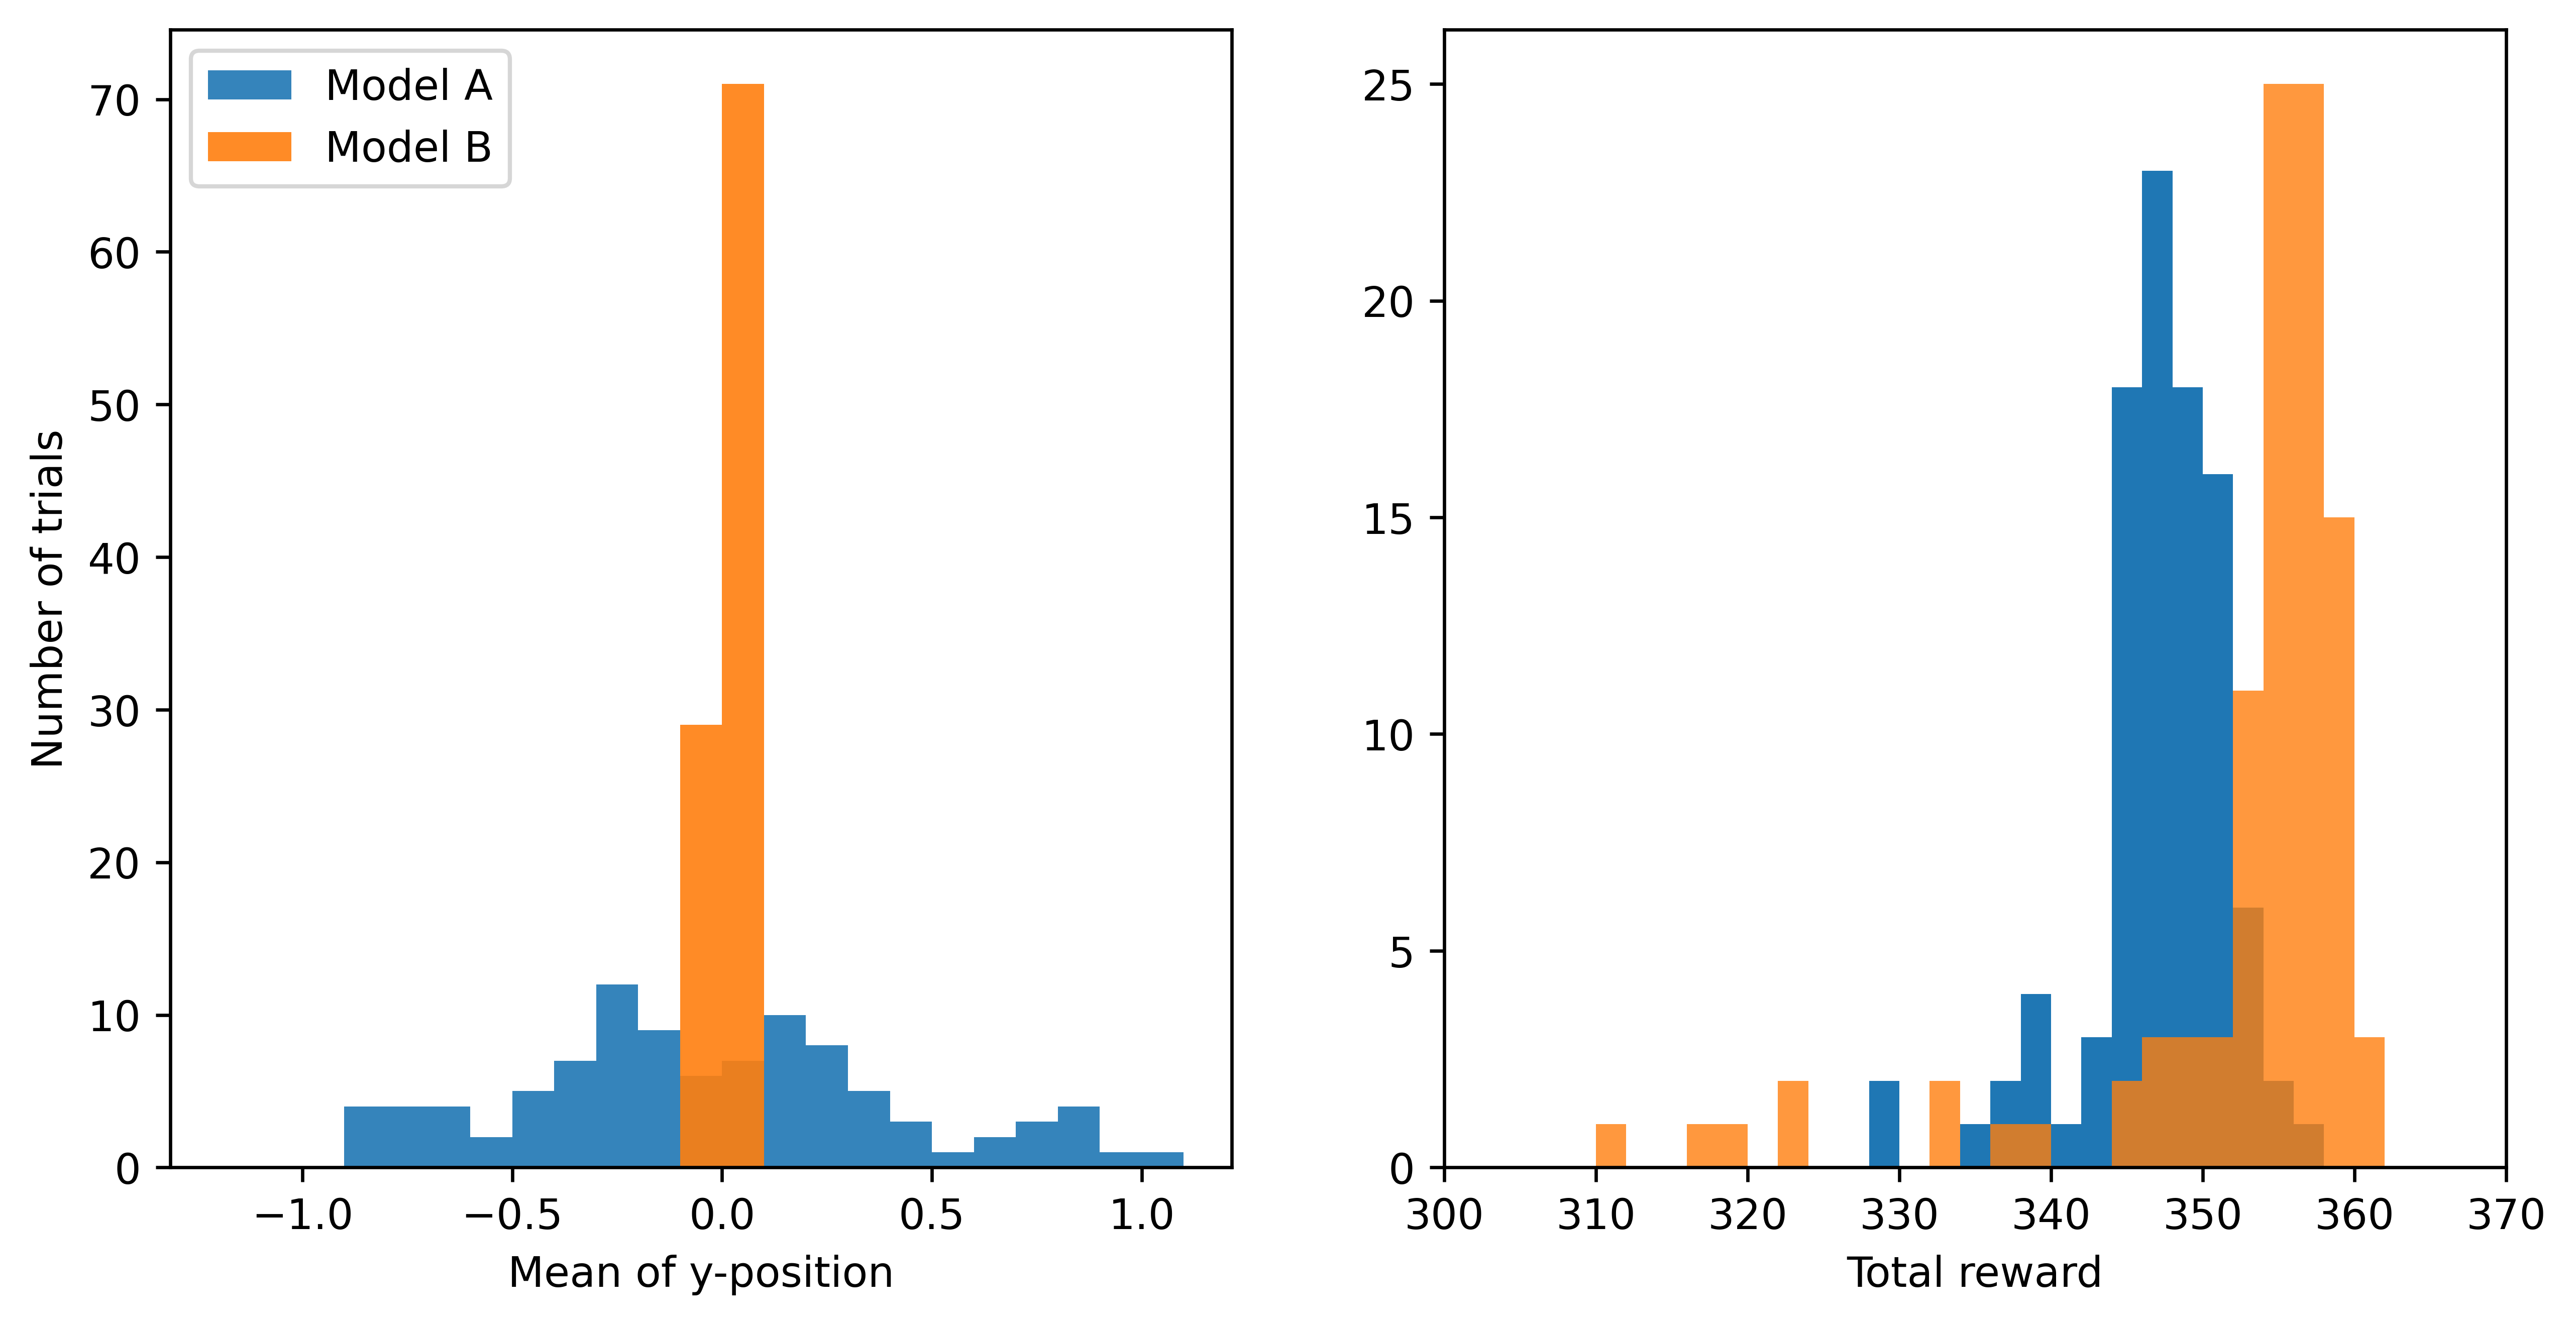

361.52452959596525


In [12]:
plt.figure(figsize=[10,5], dpi=600)
plt.subplot(1,2,1)
bins = [k/10 for k in range(-12,12,1)]
plt.hist(dir_rec0, bins=bins, alpha=0.9)
plt.hist(dir_rec1, bins=bins, alpha=0.9)
# plt.hist(dir_rec2, bins=bins, alpha=0.9)
plt.xlabel('Mean of y-position')
plt.ylabel('Number of trials')
plt.legend(['Model A', 'Model B'], loc=2)
plt.subplot(1,2,2)
bins = [k for k in range(300,370,2)]
plt.hist(reward_total_rec0, bins=bins)
plt.hist(reward_total_rec1, bins=bins, alpha=0.8)
# plt.hist(reward_total_rec2, bins=bins, alpha=0.8)
plt.xlim([300,370])
plt.xlabel('Total reward')
plt.show()
print(np.max(reward_total_rec1))

In [15]:
dir_swimmer = r'Swimmer-v4_20221011_000445/'
dir_half_cheetah = r'HalfCheetah-v4_20220919_111556/'
dir_walker = r'Walker2d-v4_20220923_144247/'
dir_ant = r'Ant-v4_20220925_152325/'
dir_hopper = r'Hopper-v4_20220919_160858/'

dir_all = [dir_swimmer, dir_half_cheetah, dir_walker, dir_ant, dir_hopper]
for dir_this in dir_all:
    log_path = 'results/' + dir_this + 'log.pickle'
    data = utils.load_pickle(log_path)
    print('['+dir_this+']' + ' Max reward: ', data['max_reward'][-1])

[Swimmer-v4_20221011_000445/] Max reward:  361.0078550583798
[HalfCheetah-v4_20220919_111556/] Max reward:  3840.888884912638
[Walker2d-v4_20220923_144247/] Max reward:  2706.9092389462303
[Ant-v4_20220925_152325/] Max reward:  1913.0884319044117
[Hopper-v4_20220919_160858/] Max reward:  2889.0206061346335
